Wojciech Poniewierka 402224 EAIiIB AiR AGH

Otwieram przetworzony plik .csv:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../Analysis_Data/processed_data.csv")
data_head = str(df.head(5))
df.head(5)

,iso2,year,sex,age,cases
0,AD,1996,m,0--14,0
1,AD,1996,m,15--24,0
2,AD,1996,m,25--34,0
3,AD,1996,m,35--44,4
4,AD,1996,m,45--54,1


Generuję ogólne statystyki i informacje:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35750 entries, 0 to 35749
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   iso2    35552 non-null  object
 1   year    35750 non-null  int64 
 2   sex     35750 non-null  object
 3   age     35750 non-null  object
 4   cases   35750 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 977.6+ KB


In [3]:
# opis zmiennych numerycznych
desc_num = str(df.describe(include=[np.number]))
print(desc_num)

               year         cases
count  35750.000000  35750.000000
mean    2002.013259    609.378881
std        4.348898   3278.187960
min     1980.000000      0.000000
25%     1999.000000      4.000000
50%     2002.000000     36.000000
75%     2006.000000    245.000000
max     2008.000000  90498.000000


In [4]:
# opis zmiennych nienumerycznych
desc_not_num = str(df.describe(include=[object]))
print(desc_not_num)

         iso2    sex     age
count   35552  35750   35750
unique    212      2      10
top        CA      m  45--54
freq      420  17920    4822


Tworzę plik data_appendix.txt i zapisuję do niego dane:

In [5]:
with open('../Documents/data_appendix.txt', 'w') as f:
    f.write("Data appendix dla przetworzonego pliku: processed_data.csv\n\n")
    f.write("Head of data:\n")
    f.write(data_head)
    f.write("\n\nOpis zmiennych numerycznych:\n")
    f.write(desc_num)
    f.write("\n\nOpis zmiennych nienumerycznych:\n")
    f.write(desc_not_num)
    f.write("\n\nOpis poszczególnych zmiennych:\n")
    f.write("\t- iso2: \n" +
                "\t\t* kod iso2\n" +
                "\t\t* w oryginalnym pliku to ta sama zmienna\n" +
                "\t\t* ilość: 35750\n")
    f.write("\t- year: \n" +
                "\t\t* rok danej obserwacji\n" +
                "\t\t* w oryginalnym pliku to ta sama zmienna\n" +
                "\t\t* ilość: 35750\n")
    f.write("\t- sex: \n" +
                "\t\t* płeć\n" +
                "\t\t* w oryginalnym pliku płeć była zakodowana w nazwach poszczególnych kolumn\n" +
                "\t\t* ilość: 35750\n")
    f.write("\t- age: \n" +
                "\t\t* wiek danej grupy osób\n" +
                "\t\t* w oryginalnym pliku wiek był zakodowany w nazwach poszczególnych kolumn razem z płcią\n" +
                "\t\t* ilość: 35750\n")
    f.write("\t- cases: \n" +
                "\t\t* ilość przypadków dla danej obserwacji\n" +
                "\t\t* dane te zostały przepisane z oryginalnego pliku pomijając puste komórki\n" +
                "\t\t* ilość: 35750\n")

Kolejnym krokiem jest utworzenie wykresów.

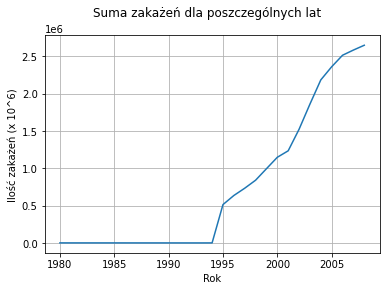

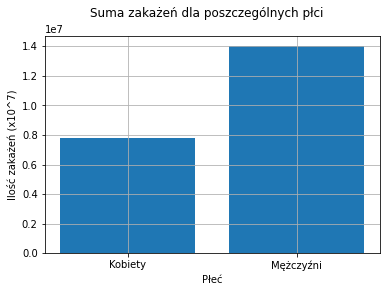

In [63]:
year_cases = df.groupby('year')['cases'].sum()
fig1, ax1 = plt.subplots()
fig1.suptitle('Suma zakażeń dla poszczególnych lat')
ax1.plot(year_cases)
ax1.grid()
ax1.set_ylabel('Ilość zakażeń (x 10^6)')
ax1.set_xlabel('Rok')
fig1.savefig('../Documents/wykres_year_cases.png')

sex_cases = df.groupby('sex')['cases'].sum()
fig2, ax2 = plt.subplots()
fig2.suptitle('Suma zakażeń dla poszczególnych płci')
ax2.bar(['Kobiety', 'Mężczyźni'], sex_cases)
ax2.grid()
ax2.set_ylabel('Ilość zakażeń (x10^7)')
ax2.set_xlabel('Płeć')
fig2.savefig('../Documents/wykres_sex_cases.png')